"ANOVA" is used when we have more than two groups and want to know if their means are different. If we only have two groups, a t-test is sufficient, but for more than two groups, using ANOVA is essential.

**ANOVA Assumptions**  
To perform ANOVA, three main assumptions must be met:

1. **Normality of data:**  
   The data must follow a normal distribution.

2. **Homogeneity of variances:**  
   The variances across all groups must be equal.

3. **Independence of observations:**  
   Observations in the groups must be independent of each other.

### Demonstrating the F-Distribution in ANOVA

In [1]:
group <- factor(c(rep("A", 5), rep("B", 5), rep("C", 5)))
values <- c(8, 9, 7, 10, 9, 12, 11, 13, 14, 15, 20, 21, 19, 22, 23)

data <- data.frame(group, values)

In [2]:
data

group,values
<fct>,<dbl>
A,8
A,9
A,7
A,10
A,9
B,12
B,11
B,13
B,14


In [4]:
anova_result <- aov(values ~ group, data = data)

In [6]:
anova_result

Call:
   aov(formula = values ~ group, data = data)

Terms:
                group Residuals
Sum of Squares  395.2      25.2
Deg. of Freedom     2        12

Residual standard error: 1.449138
Estimated effects may be unbalanced

In [7]:
summary(anova_result)

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        2  395.2   197.6   94.09 4.64e-08 ***
Residuals   12   25.2     2.1                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### * Df (degrees of freedom):

group: number of groups minus one (k−1=3−1=2).

Residuals: the total number of data minus the number of groups (n−k=15−3=12).

### * Sum Sq (sum of squares):

group: sum of squares between groups (Between-Group Variance), equal to 395.2

Residuals: sum of squares within groups (Within-Group Variance), equal to 25.2

### * Mean Sq:

Obtained by dividing the sum of squares (Sum Sq) by the degree of freedom (Df)

### * F value (F statistic):

The ratio of mean square between groups to mean square within groups

### * Pr(>F) (p value):

The probability of observing the F statistic is equal to or greater than the calculated value (94.09) under the null hypothesis.

The value of p=4.64×10^−8 is very small, which indicates that the difference in means is very significant.

In conclusion, the null hypothesis(H0), which states that the averages of the groups are equal, is rejected.

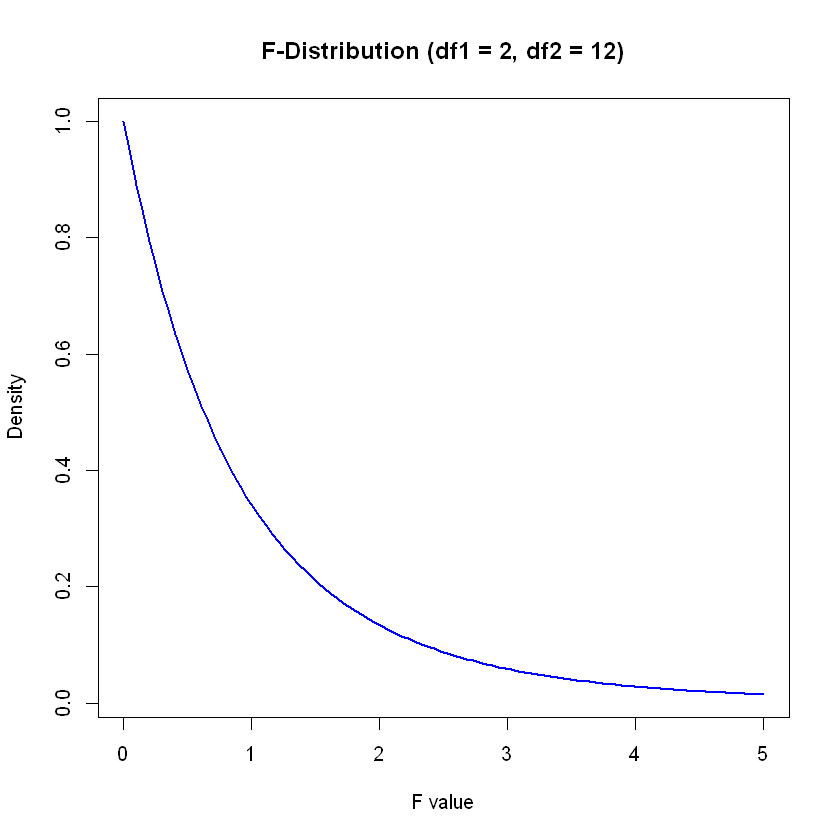

In [2]:
df1 <- 2  # Numerator degrees of freedom (k-1)
df2 <- 12 # Denominator degrees of freedom (n-k)

x <- seq(0, 5, length.out = 100)
y <- df(x, df1, df2)

plot(x, y, type = "l", col = "blue", lwd = 2,
     main = "F-Distribution (df1 = 2, df2 = 12)",
     xlab = "F value", ylab = "Density")

### The effect of degrees of freedom on the F distribution
Numerator degrees of freedom (df₁):
If df₁ is small (less than 5), the F distribution has a longer tail to the right. As df₁ increases, the F distribution becomes more concentrated and symmetrical.

Denominator degrees of freedom (df₂):
If df₂ is small, the F distribution has a long tail and its skewness is high. As df₂ increases, the F distribution resembles a normal distribution.

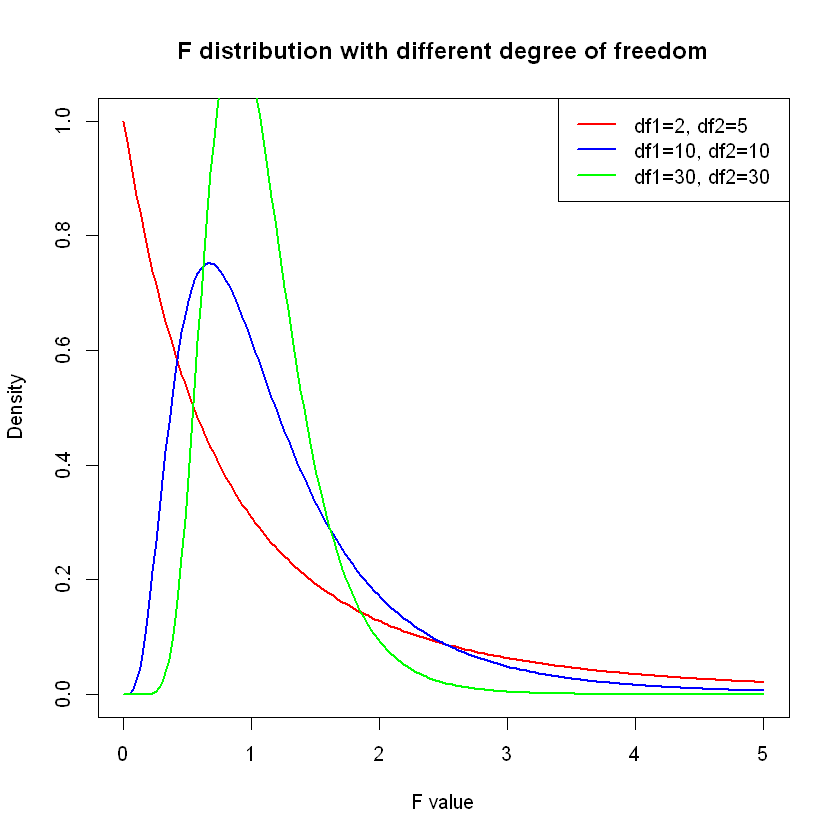

In [1]:
x <- seq(0, 5, length.out = 200)

f_df_2_5 <- df(x, df1 = 2, df2 = 5)
f_df_10_10 <- df(x, df1 = 10, df2 = 10)
f_df_30_30 <- df(x, df1 = 30, df2 = 30)

plot(x, f_df_2_5, type = "l", col = "red", lwd = 2, ylim = c(0, 1),
     main = "F distribution with different degree of freedom",
     xlab = "F value", ylab = "Density")
lines(x, f_df_10_10, col = "blue", lwd = 2)
lines(x, f_df_30_30, col = "green", lwd = 2)

legend("topright", legend = c("df1=2, df2=5", "df1=10, df2=10", "df1=30, df2=30"),
       col = c("red", "blue", "green"), lwd = 2)

### Interpretation of the chart:
df1 = 2, df2 = 5: Long tail and short peak. The distribution is highly skewed.

df1 = 10, df2 = 10: Taller peak and less skewness.

df1 = 30, df2 = 30: Nearly symmetrical and resembles a normal distribution.

### Applied analysis:
Low degrees of freedom:
Usually used in small samples. The test output is more sensitive.

High degrees of freedom:
Usually in large samples. Results are more stable and the distribution approaches normality.

Another example ...:

In [8]:
group <- factor(c(rep("A", 10), rep("B", 10), rep("C", 10)))
scores <- c(85, 90, 88, 84, 89, 87, 86, 85, 91, 88,  # Group A
            78, 82, 80, 79, 77, 81, 83, 84, 82, 80,  # Group B
            92, 95, 94, 93, 91, 89, 90, 96, 94, 93)  # Group C

df <- data.frame(group, scores)

In [9]:
df

group,scores
<fct>,<dbl>
A,85
A,90
A,88
A,84
A,89
A,87
A,86
A,85
A,91


In [10]:
anova_result <- aov(scores ~ group, data = df)

summary(anova_result)

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        2  734.9   367.4   72.63 1.37e-11 ***
Residuals   27  136.6     5.1                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The value of 1.37×10^−11 is much smaller than 0.05, so the null hypothesis is rejected.

Result: The average scores of the groups are significantly different.

### Check ANOVA assumptions

- A. Checking the normality of the data:

In [11]:
shapiro.test(df$scores)


	Shapiro-Wilk normality test

data:  df$scores
W = 0.96336, p-value = 0.3764


Null hypothesis: The data follows a normal distribution.

p-value: The value of 0.3764 is greater than 0.05, so the null hypothesis is not rejected.

Result: The data are significantly normal.

### -------------------------------------------------------------------------------------------------------------------

- b. Checking the homogeneity of variances:

In [12]:
bartlett.test(scores ~ group, data = df)


	Bartlett test of homogeneity of variances

data:  scores by group
Bartlett's K-squared = 0.020177, df = 2, p-value = 0.99


Null hypothesis: variances are the same between groups.

p-value: A value of 0.99 is greater than 0.05, so the null hypothesis is not rejected.

Result: The variances are the same between the groups.

### -------------------------------------------------------------------------------------------------------------------

If ANOVA shows that there is a significant difference between groups, we need to know which groups are different from each other. This is done through multiple difference tests (Post Hoc Tests).

#### Tukey test:

In [13]:
TukeyHSD(anova_result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = scores ~ group, data = df)

$group
    diff       lwr       upr    p adj
B-A -6.7 -9.194067 -4.205933 1.10e-06
C-A  5.4  2.905933  7.894067 3.29e-05
C-B 12.1  9.605933 14.594067 0.00e+00


B-A: The mean of group B is significantly 6.7 units lower than group A (p ≈ 1.1×10^−6).

C-A: The mean of group C is significantly 5.4 units higher than group A (p ≈ 3.29×10^−5).

C-B: The mean of group C is significantly 12.1 units higher than group B (p ≈ 0).

Post Hoc Result:
All three groups are significantly different from each other.